## MiniGPT-4

### 官网：
https://minigpt-4.github.io/

### Paper:
https://arxiv.org/abs/2304.10592

### 介绍
- MiniGPT-4背后团队来自KAUST（沙特阿卜杜拉国王科技大学），是几位中国博士开发的。

- 团队把图像编码器与开源语言模型Vicuna（小羊驼）整合起来，并且冻结了两者的大部分参数，只需要训练很少一部分。

- 当前：团队正在准备一个更轻量级的版本，部署起来只需要23GB显存

### 项目要点：

- 模型组合：Q-Former&ViT+Vicuna，增强视觉语言理解（看图说话）
- 低成本：4块A100GPU，训练了仅仅10个小时

### 能力介绍：

- MiniGPT-4 具有许多类似于 GPT-4 的能力, 图像描述生成、从手写草稿创建网站等

- MiniGPT-4 还能根据图像创作故事和诗歌，为图像中显示的问题提供解决方案，教用户如何根据食物照片做饭等。

### 模型结构：

- 投影层（Projection Layer）是神经网络中常见层类型，将输入数据从一个空间映射到另一个空间。

- NLP中，投影层通常用于将高维词向量映射到低维空间，以减少模型参数数量和计算量。

- CV中，投影层可以将高维图像特征向量映射到低维空间，以便于后续处理和分析。

- 将一个冻结的视觉编码器(Q-Former&ViT)与一个冻结的 文本生成大模型（Vicuna，江湖人称：小羊驼） 进行对齐，造出了 MiniGPT-4

- 用两个阶段训练 MiniGPT-4. 
    - 第一个传统的预训练阶段是使用 4 个 A100 在 10 小时内使用大约 500 万个对齐的图像-文本对进行训练。在第一阶段之后，小羊驼能够理解图像。但小羊驼的能力受到严重影响。

- 为了解决这个问题并提高可用性，我们提出了一种新颖的方法，通过模型本身和 ChatGPT 一起创建高质量的图像-文本对。在此基础上，我们创建了一个小（总共 3500 对）但高质量的数据集。

    - 第二个微调阶段是在对话模板中对该数据集进行训练，以显著提高其生成可靠性和整体可用性。这个阶段的计算效率很高，使用单个 A100 只需大约 7 分钟。

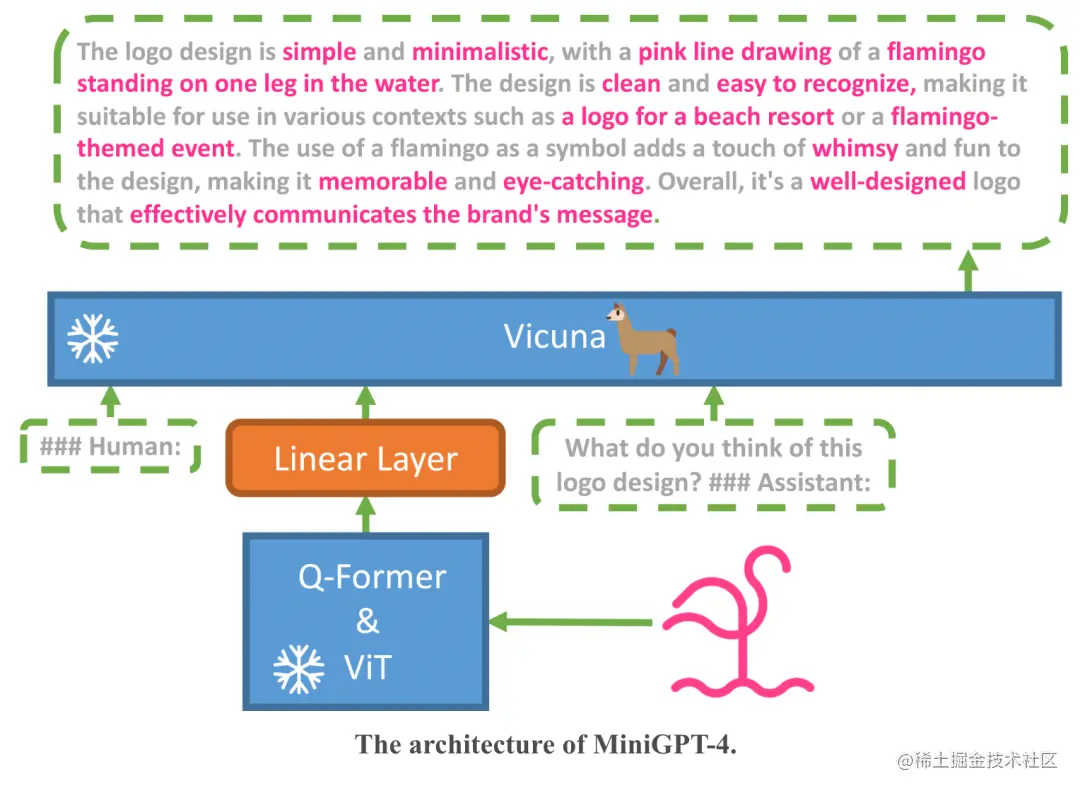


## Demo

### 体验地址:
体验地址：https://huggingface.co/spaces/Vision-CAIR/minigpt4

### 讲解：

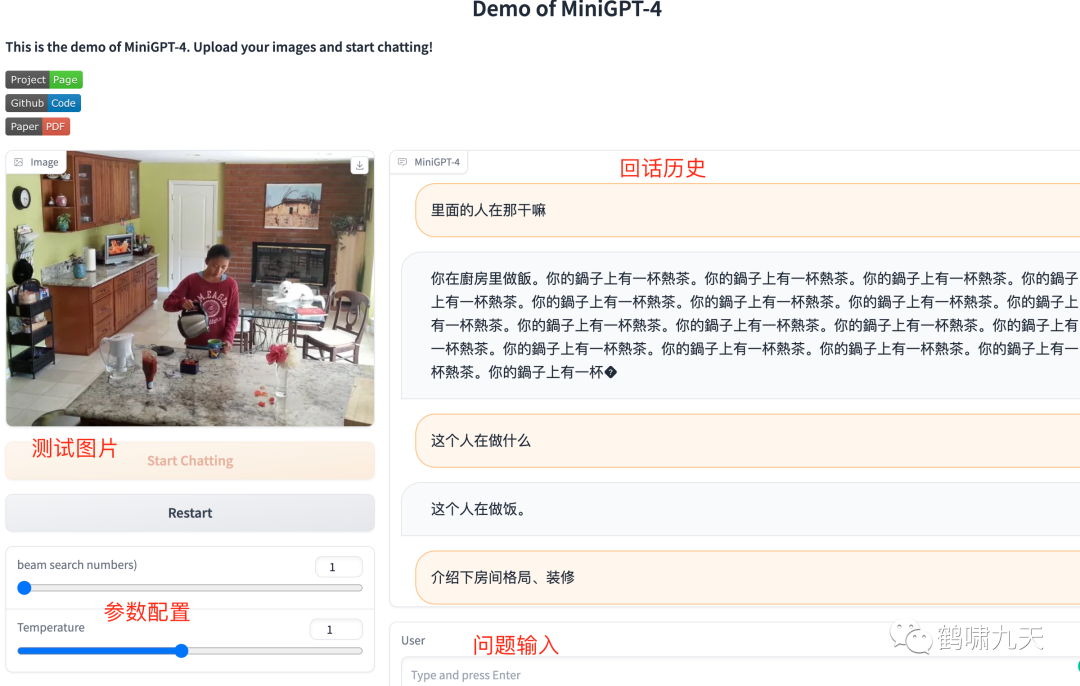

Demo页面分为几个功能区

- 测试图片区：用户自行上传要测试的图片

- 参数配置区：文本生成参数自定义，主要有两个：

    - beam search数（beam_size）：一种解码算法——集束解码（beam search decoding），每步解码时生成几个候选。

        - 当beam_size=1时，退化为 贪心解码（greedy search docoding），每次只选取概率最高的结果。贪心解码快质量一般。

        - 当beam_size>1时，集束解码效果好但速度慢

    - temperature：温度，控制生成结果的多样性

        - 当 temperature→0，就变成greedy search；

        - 当 temperature→∞，就变成均匀采样（uniform sampling）

- 问题输入：根据图片，输入问题，系统自动作答

- 会话历史：展示历史会话信息

### 效果展示

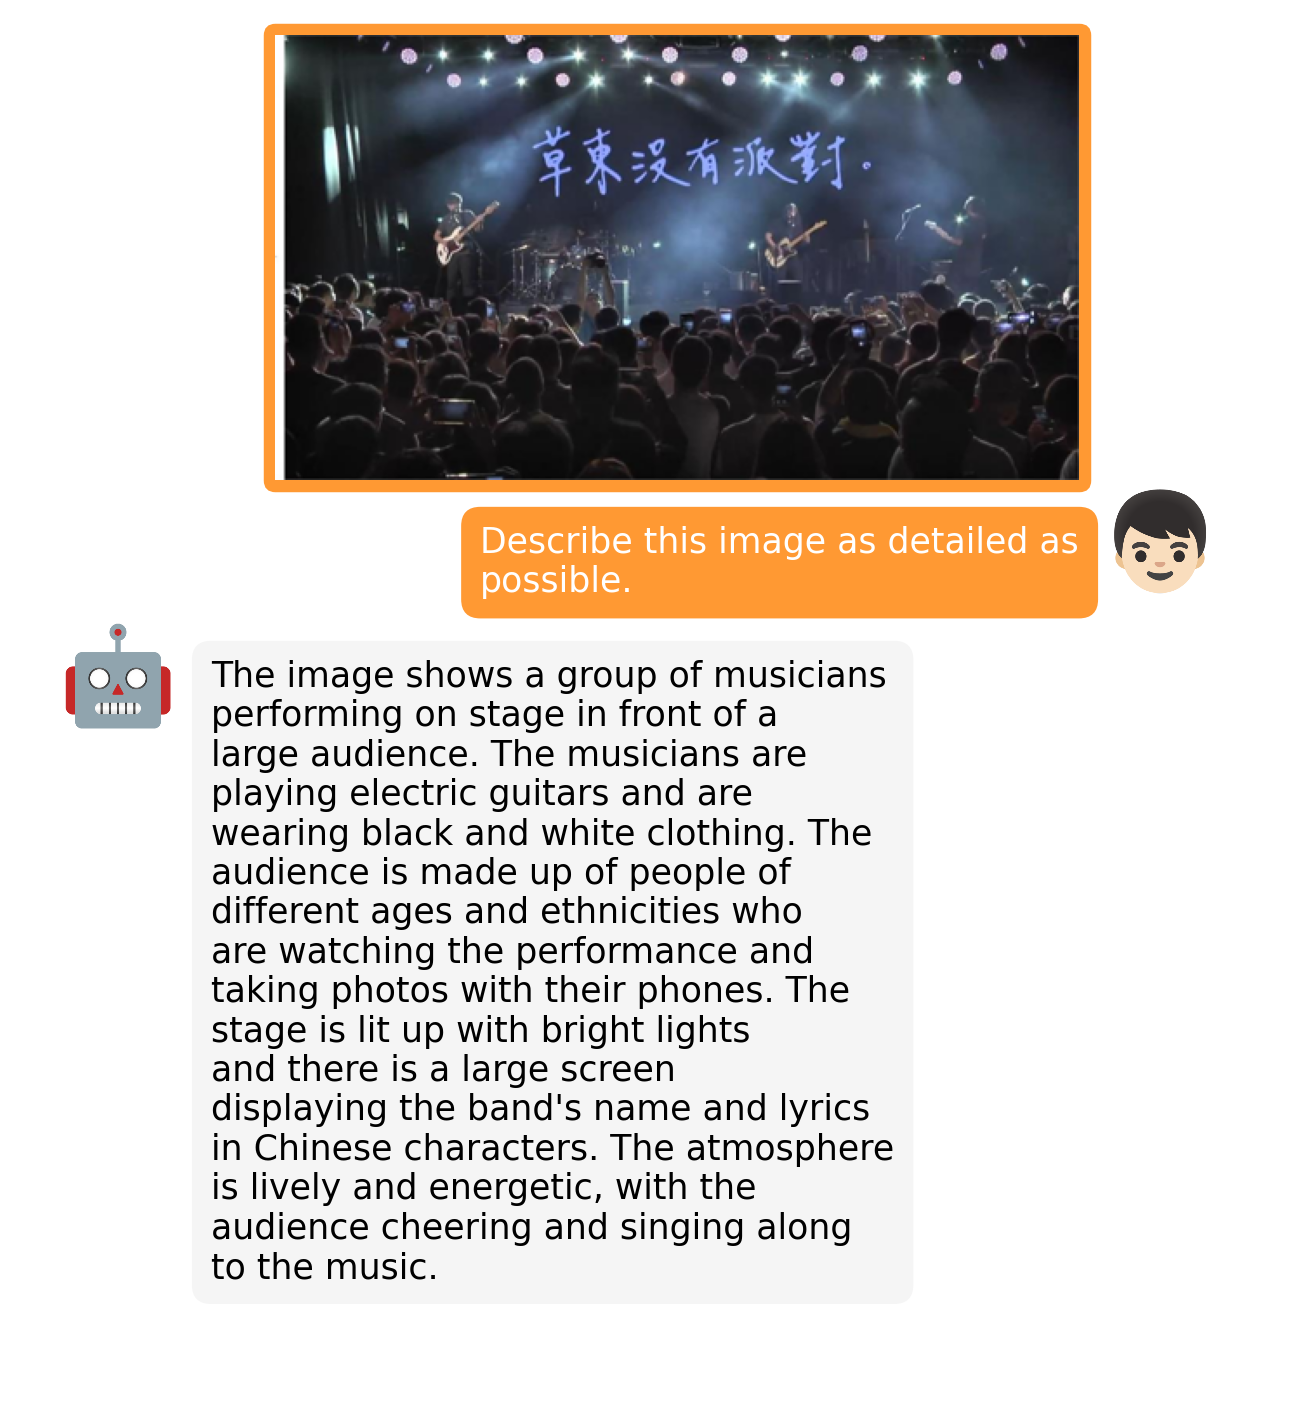


## 安装部署

### Google CoLab

复制代码：
https://colab.research.google.com/drive/1OK4kYsZphwt5DXchKkzMBjYF6jnkqh4R?usp=sharing

### 本地安装部署
 - 首先是下载项目&准备环境：
```python
git clone https://github.com/Vision-CAIR/MiniGPT-4.git
cd MiniGPT-4
conda env create -f environment.yml
conda activate minigpt4
```

- 然后下载预训练模型：
https://drive.google.com/file/d/1RY9jV0dyqLX-o38LrumkKRh6Jtaop58R/view?usp=sharing
```python
vicuna_weights
├── config.json
├── generation_config.json
├── pytorch_model.bin.index.json
├── pytorch_model-00001-of-00003.bin
...   
```


- 最后在本地启动Demo：
```python
python demo.py --cfg-path eval_configs/minigpt4_eval.yaml
```
通过这个项目我们也再一次看出大模型在视觉领域的可行性，未来在图像、音频、视频等方面的应用前景应该也是非常不错的，我们可以期待一下。
